# COMPREHENSIVE DATA EXPLORATION WITH PYTHON
[Pedro Marcelino](http://pmarcelino.com) - February 2017

Other Kernels: [Data analysis and feature extraction with Python
](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)

----------

Các nội dung cần thực hiện trong phân tích thăm dò dữ liệu
1. <b>Tìm hiểu sơ bộ về tập dữ liệu</b>
2. <b>Phân tích để hiểu các biến đơn</b>
3. <b>Phân tích để hiểu mối tương quan giữa các biến</b>

Một vài công việc mở rộng
4. <b>Basic cleaning</b>
5. <b>Test assumptions</b>

In [4]:
print('hello okoskgso')

hello okoskgso


In [1]:
!pip install pandas 

You should consider upgrading via the '/Users/trungtv/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install sklearn

You should consider upgrading via the '/Users/trungtv/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Đọc dữ liệu từ tệp tin csv về dưới dạng dataframe trong pandas 

In [5]:
df_train = pd.read_csv('./input/train.csv')

# 1. Tìm hiểu sơ bộ về tập dữ liệu
Xem danh sách các cột thuộc tính trong bảng dữ liệu

In [6]:
# Dataframe 
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Xem sơ bộ bảng dữ liệu

In [7]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 2. Phân tích để hiểu các biến đơn: Phân tích 'SalePrice'

- 'SalePrice' là biến mục tiêu để dự đoán, do vậy rất quan trọng và cần phải hiểu rõ về biến mục tiêu này
- Pandas dataframe cung cấp cho chúng ta phương thức để nhanh chóng xem các thông tin thống kê về từng biến

In [8]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df_train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Dùng biểu đồ histogram để xem phân bố các giá trị trong biến 'SalePrice'

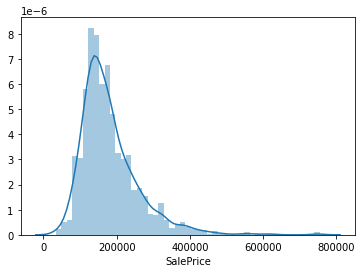

In [14]:
#histogram
sns.distplot(df_train['SalePrice']);

Nhận xét chung về 'SalePrice'
- Có dạng phân bố chuẩn
- Có dạng nhọn và lệch dương

In [10]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Hãy làm các phân tích cho các trường thuộc tính khác trong bảng dữ liệu

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

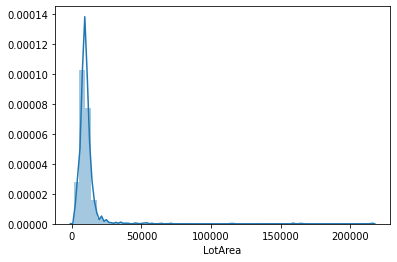

In [11]:
# Mã nguồn của bạn ở đây
sns.distplot(df_train['LotArea']);
df_train['LotArea'].describe()

# 2. Phân tích mối tương quan: Giữa 'SalePrice' và các biến khác

### Tương quan với các biến kiểu số
Sử dụng biểu đồ scatterplot

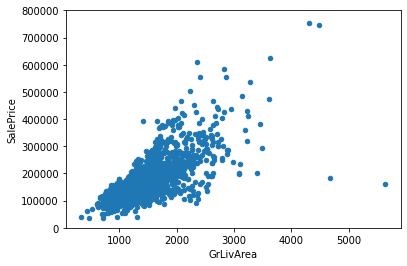

In [12]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 'SalePrice' và 'GrLivArea' có mối tương quan tuyến tính? 
- Xem xét với biến 'TotalBsmtSF'?*

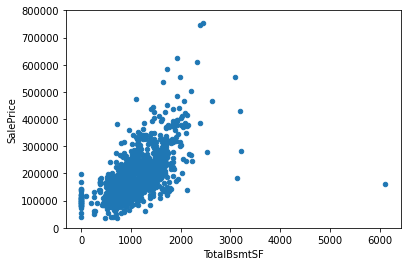

In [13]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- Có ngoại lệ? 
- Tuyến tính hay cấp số mũ?

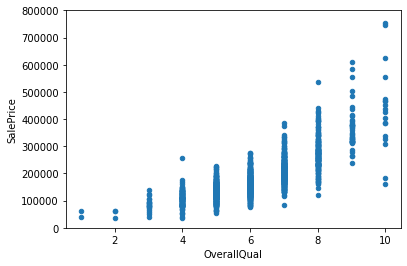

In [16]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Mối quan hệ với các đặc trưng dạng catalog
Xem xét mối quan hệ giữa 'SalePrice' với 'OverallQual'

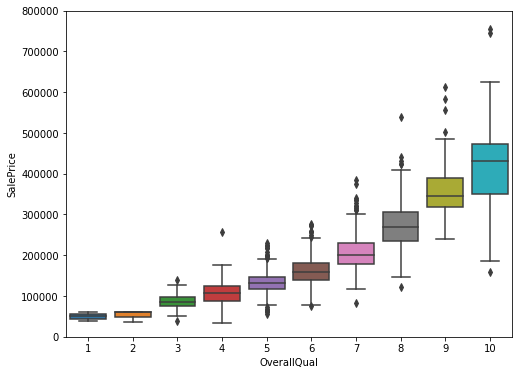

In [24]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [19]:
data.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


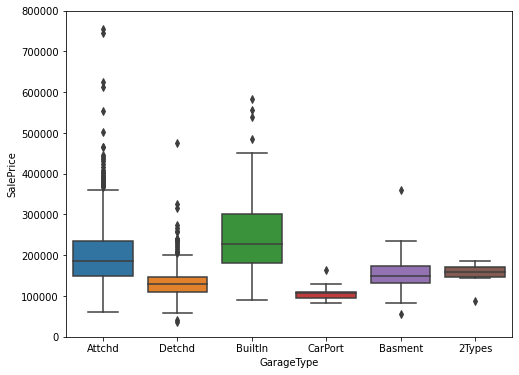

In [25]:

#box plot overallqual/saleprice
var = 'GarageType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Nhận xét về mối quan hệ này như thế nào? 

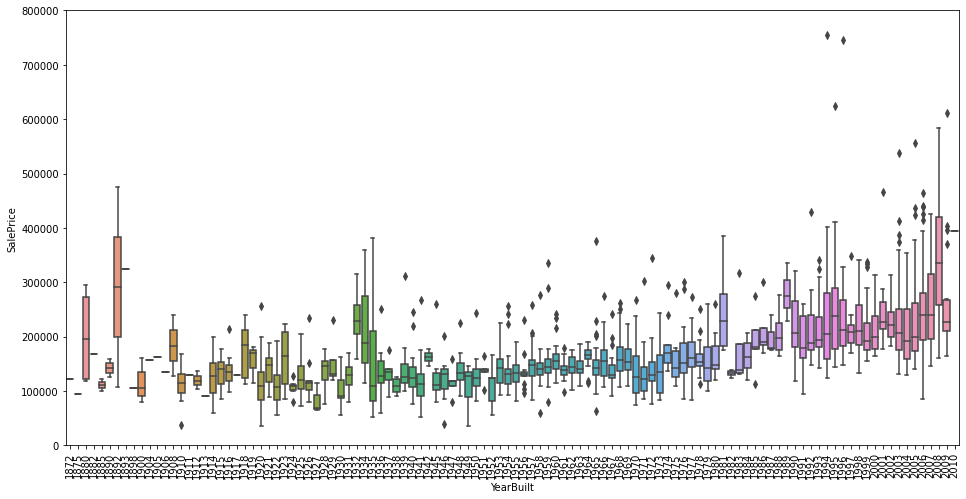

In [26]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Nhận xét về mối quan hệ này như thế nào?

Hãy xem xét các mối quan hệ khác bằng cách thêm mã của bạn vào bên dưới

In [16]:
# Mã nguồn của bạn ở đây

###  Tổng kết

* 'GrLivArea' và 'TotalBsmtSF' dường như có mối quan hệ tuyến tính với 'SalePrice'. Mối quan hệ tuyến tính này là cùng chiều hay ngược chiều? 

* 'OverallQual' và 'YearBuilt' cũng có mối quan hệ với 'SalePrice'. 'OverallQual' có mối quan hệ rõ dàng hơn. 

Phân tích thăm dò dữ liệu có vai trò rất quan trọng. Cho phép chúng ta có thể hiểu về dữ liệu để làm tốt các bước tiếp theo trong quy trình làm khoa học dữ liệu, đặc biệt trong trích chọn và xây dựng các đặc trưng mạnh cho bài toán xây dựng mô hình. 

# 3. Một vài cải thiện có thể làm

#### Correlation matrix (heatmap style)
Dùng thư viện để hiển thị ma trận tương quan

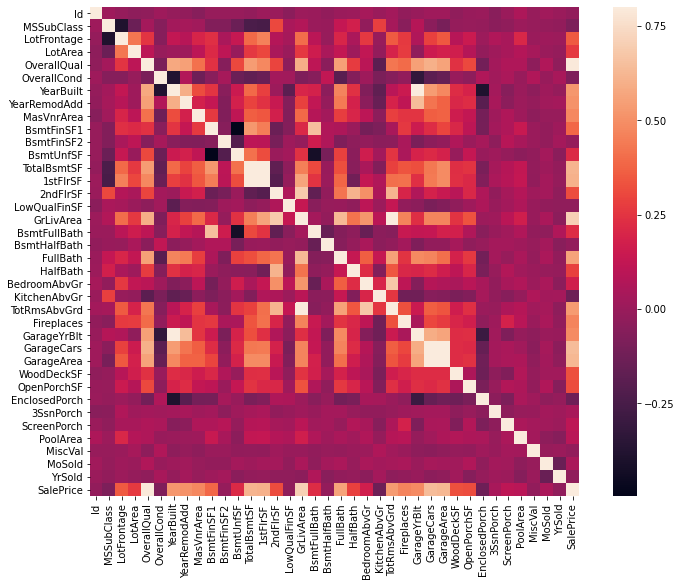

In [29]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [28]:
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


- Đây là cách nhanh chóng để tìm ra mối liên hệ giữa các biến. 
- Xem xét 'TotalBsmtSF', '1stFlrSF' và 'Garage*X*'
- Xem xét 'SalePrice' và 'GrLivArea', 'TotalBsmtSF', 'OverallQual'

#### 'SalePrice' correlation matrix (zoomed heatmap style)
Phân tích tương quan mạnh nhất với 'SalePrice' 

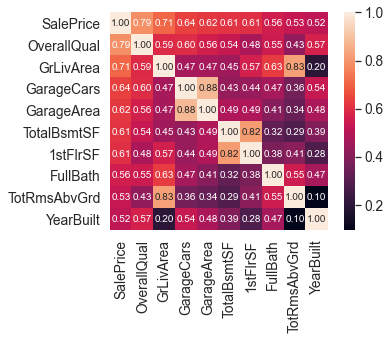

In [31]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [35]:
corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

Nhận xét:
* 'OverallQual', 'GrLivArea' và 'TotalBsmtSF' tương quan mạnh với 'SalePrice'. 
* 'GarageCars', 'GarageArea' dường như 2 anh em sinh đôi -> chỉ cần giữ lại 1 biến trong 2. Giữ lại biến nào? 
* 'TotalBsmtSF' và '1stFloor' cũng có vẻ như 2 anh em sinh đôi.
* 'FullBath'?
* 'TotRmsAbvGrd', 'GrLivArea'
* 'YearBuilt' tương quan nhẹ với 'SalePrice'

#### Scatter plots giữa 'SalePrice' và các biến tương quan mạnh

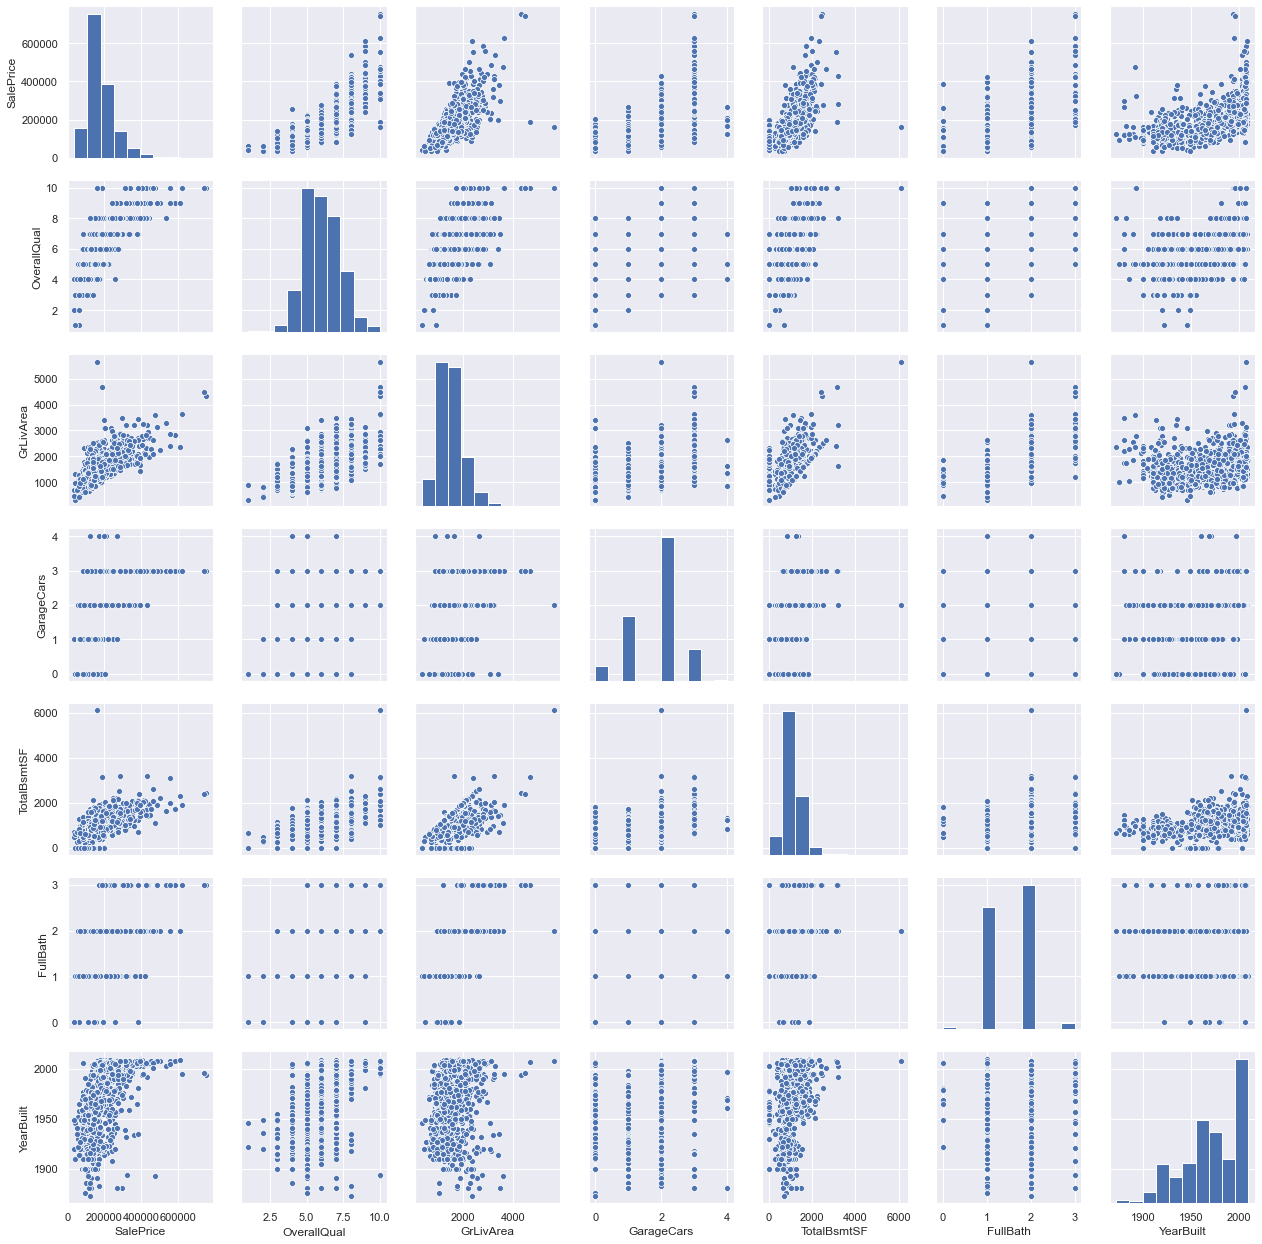

In [36]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

- Xem xét 'TotalBsmtSF' và 'GrLiveArea'. 'TotalBsmtSF' <= 'GrLiveArea'. 
- Xem xét 'SalePrice' và 'YearBuilt'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


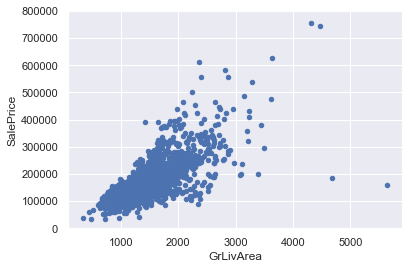

In [37]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [29]:
#data

In [27]:
from sklearn.cluster import KMeans
import numpy as np

In [37]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)

In [38]:
z_pred = kmeans.fit_predict(data)

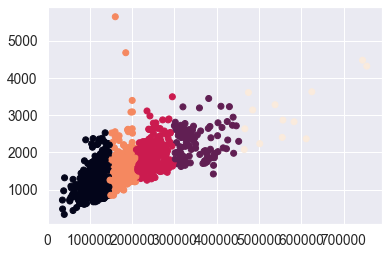

In [39]:
plt.scatter(data['SalePrice'], data['GrLivArea'], c=z_pred)

In [44]:
import random
random.seed(10)

In [45]:
for i in range(5):
    print("{}: {}".format(i, random.random()))

0: 0.5714025946899135
1: 0.4288890546751146
2: 0.5780913011344704
3: 0.20609823213950174
4: 0.81332125135732


In [46]:
import random
random.seed(20)

In [47]:
for i in range(5):
    print("{}: {}".format(i, random.random()))

0: 0.9056396761745207
1: 0.6862541570267026
2: 0.7665092563626442
3: 0.9046162378132736
4: 0.2598274474889769


In [48]:
import random
random.seed(10)

In [49]:
for i in range(5):
    print("{}: {}".format(i, random.random()))

0: 0.5714025946899135
1: 0.4288890546751146
2: 0.5780913011344704
3: 0.20609823213950174
4: 0.81332125135732
